In [1]:
library(dplyr)
library(readr)
install.packages("caret")
library(caret)
install.packages("forecast")
library(forecast)
install.packages("glmnet")
library(glmnet)
install.packages("survminer")
library(survminer)
install.packages("survival")
library(survival)


Attaching package: ‘dplyr’


The following objects are masked from ‘package:stats’:

    filter, lag


The following objects are masked from ‘package:base’:

    intersect, setdiff, setequal, union


Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘listenv’, ‘parallelly’, ‘future’, ‘globals’, ‘shape’, ‘future.apply’, ‘numDeriv’, ‘progressr’, ‘SQUAREM’, ‘diagram’, ‘lava’, ‘prodlim’, ‘proxy’, ‘iterators’, ‘Rcpp’, ‘clock’, ‘gower’, ‘hardhat’, ‘ipred’, ‘timeDate’, ‘e1071’, ‘foreach’, ‘ModelMetrics’, ‘plyr’, ‘pROC’, ‘recipes’, ‘reshape2’


Loading required package: ggplot2

Loading required package: lattice

Installing package into ‘/usr/local/lib/R/site-library’
(as ‘lib’ is unspecified)

also installing the dependencies ‘xts’, ‘TTR’, ‘quadprog’, ‘quantmod’, ‘fracdiff’, ‘lmtest’, ‘tseries’, ‘urca’, ‘zoo’, ‘RcppArmadillo’


Registered S3 method overwritten by 'quantmod':
  method            from
  as.zoo.data.frame zoo 

I

In [46]:
# Leer el archivo CSV desde la URL
url <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/maquina2.csv"
df <- read_csv(url, show_col_types = FALSE)
df_copy <- df

In [3]:
head(df,5)

Equipment,Operation,WO Type,Model Base,Problem Code,Failure Code,Cause Code,Action Code,Date,downtimeGross,partsCost,repairHours
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
100268,BIND LEG,Corrective Maintenance,VF2500,SEWP002,SEWF001,SEWC012,SEWA013,1/17/2024,3.00,12.50,2.00
100268,BIND LEG,Corrective Maintenance,VF2500,SEWP002,SEWF001,SEWC017,SEWA013,10/3/2023,1.25,16.81,1.25
100268,BIND LEG,Calibration,VF2500,SEWP001,SEWF001,SEWC001,SEWA001,7/14/2023,0.08,0.74,0.08
100312,BARTACK,Corrective Maintenance,LT2-B872,SEWP001,SEWF001,SEWC005,SEWA005,3/18/2023,0.25,2.67,0.25
100312,SET ZIPPER,Corrective Maintenance,LT2-B872,SEWP001,SEWF008,SEWC082,SEWA083,3/9/2023,0.33,0.00,0.33


In [4]:
# Calcular la frecuencia de cada operación
operation_freq <- df %>%
  group_by(Operation) %>%
  summarise(count = n()) %>%
  arrange(desc(count))

# Calcular el porcentaje acumulado
operation_freq <- operation_freq %>%
  mutate(cum_count = cumsum(count),
         cum_perc = cum_count / sum(count))

operation_freq

Operation,count,cum_count,cum_perc
<chr>,<int>,<int>,<dbl>
HEM SLEEVE,14035,14035,0.1649740
HEM BOTTOM,10608,24643,0.2896655
JOIN PANEL,5498,30141,0.3542916
TAPE SHOULDER,3808,33949,0.3990526
HEM AROUND,3564,37513,0.4409455
SET SLEEVE,3270,40783,0.4793827
ATTACH ELASTIC,3093,43876,0.5157392
JOIN SHOULDER,2938,46814,0.5502739
FLAT LOCK,2875,49689,0.5840680


In [5]:
# Convertir la columna 'Date' al formato adecuado
df$Date <- as.Date(df$Date, format="%m/%d/%Y")  # Ajusta el formato según tus datos
# Ordenar el DataFrame por fecha
df <- df %>%
  arrange(Date)

In [6]:
# Calcular la diferencia en días entre la fecha actual y la fecha del último mantenimiento preventivo registrado para cada equipo
df <- df %>%
  group_by(Equipment) %>%
  mutate(Time_Since_Last_Preventive_Maintenance = ifelse(`WO Type` == "Preventative Maintenance", difftime(max(Date), Date, units = "days"), 0))

In [7]:
# Filtrar el DataFrame por 'WO Type' igual a 'Corrective Maintenance'
df <- df %>%
  filter(`WO Type` == "Corrective Maintenance")

In [8]:
# Calcular la diferencia en días entre fechas consecutivas
df <- df %>%
  group_by(Equipment) %>%
  mutate(Days_Between_Failures = difftime(Date, lag(Date), units = "days"))

# Reemplazar los valores NA en Days_Between_Failures
df$Days_Between_Failures[is.na(df$Days_Between_Failures)] <- as.numeric(difftime(df$Date[is.na(df$Days_Between_Failures)], as.Date("2023-01-01"), units = "days"))

In [9]:
df <- df %>%
  group_by(Equipment) %>%
  mutate(Cumulative_Failure_Count = row_number())

In [10]:
# Calcular el promedio de tiempo de reparación
df <- df %>%
  group_by(Equipment) %>%
  mutate(Average_Repair_Time = mean(repairHours, na.rm = TRUE))

In [11]:
# Calcular el costo acumulado de mantenimiento
df <- df %>%
  group_by(Equipment) %>%
  mutate(Cumulative_Maintenance_Cost = cumsum(partsCost))

**MODELO DE REGRESIÓN LOGÍSTICA**

In [48]:
# Crear una nueva columna llamada 'critically' basada en la condición de 'downtimeGross'
df_copy$critically <- ifelse(df_copy$downtimeGross > 0.5, 0, 1)

In [49]:
head(df_copy,5)

Equipment,Operation,WO Type,Model Base,Problem Code,Failure Code,Cause Code,Action Code,Date,downtimeGross,partsCost,repairHours,critically
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>,<dbl>
100268,BIND LEG,Corrective Maintenance,VF2500,SEWP002,SEWF001,SEWC012,SEWA013,1/17/2024,3.00,12.50,2.00,0
100268,BIND LEG,Corrective Maintenance,VF2500,SEWP002,SEWF001,SEWC017,SEWA013,10/3/2023,1.25,16.81,1.25,0
100268,BIND LEG,Calibration,VF2500,SEWP001,SEWF001,SEWC001,SEWA001,7/14/2023,0.08,0.74,0.08,1
100312,BARTACK,Corrective Maintenance,LT2-B872,SEWP001,SEWF001,SEWC005,SEWA005,3/18/2023,0.25,2.67,0.25,1
100312,SET ZIPPER,Corrective Maintenance,LT2-B872,SEWP001,SEWF008,SEWC082,SEWA083,3/9/2023,0.33,0.00,0.33,1


In [ ]:
df_copy$critically <- as.factor(df_copy$critically)

In [ ]:
# Filtrar el DataFrame por 'WO Type' igual a 'Corrective Maintenance'
df_copy <- df_copy %>%
  filter(`WO Type` == "Corrective Maintenance")

In [ ]:
# Ajustar el modelo de regresión logística
logistic_model <- glm(critically ~ -Equipment -`WO Type`., data = df_copy, family = binomial(link="logit"))

# Resumen del modelo
summary(logistic_model)

**MODELO DE REGRESION LINEAL PARA PREDECIR DAYS BETWEEN FAILURES**

In [12]:
# Inicializar y ajustar el modelo de regresión lineal
df <- select(df, -`WO Type`)
# Convertir la variable Days_Between_Failures a tipo de datos numérico
df$Days_Between_Failures <- as.numeric(df$Days_Between_Failures)

In [13]:
head(df,5)

Equipment,Operation,Model Base,Problem Code,Failure Code,Cause Code,Action Code,Date,downtimeGross,partsCost,repairHours,Time_Since_Last_Preventive_Maintenance,Days_Between_Failures,Cumulative_Failure_Count,Average_Repair_Time,Cumulative_Maintenance_Cost
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<dbl>,<dbl>
1011144,HEM SLEEVE,VC2700,SEWP012,SEWF008,SEWC082,SEWA083,2023-01-03,0.17,51.00,0.17,0,2,1,1.0138017,51.00
1013453,TOP STITCH,VC2713,SEWP002,SEWF001,SEWC001,SEWA001,2023-01-03,1.00,19.20,1.00,0,2,1,1.0130000,19.20
1027243,SET SLEEVE,VC2700,SEWP002,SEWF009,SEWC100,SEWA095,2023-01-03,0.50,60.69,0.50,0,2,1,0.6470370,60.69
1027509,HEM AROUND,VC2711,SEWP001,SEWF001,SEWC001,SEWA001,2023-01-03,0.17,75.00,0.17,0,2,1,0.6990909,75.00
1030654,FLAT LOCK,FD62,SEWP001,SEWF001,SEWC014,SEWA004,2023-01-03,0.17,26.00,0.17,0,2,1,0.6375000,26.00


In [14]:
formula <- as.formula("Days_Between_Failures ~ Equipment + Operation + `Model Base` + `Problem Code` + `Failure Code` +
`Cause Code` + `Action Code` + downtimeGross + partsCost + repairHours + Time_Since_Last_Preventive_Maintenance + Cumulative_Failure_Count + Average_Repair_Time +
Cumulative_Maintenance_Cost")

In [15]:
# Inicializar y ajustar el modelo de regresión lineal
model <- lm(formula = formula, data = df)
# Resumen del modelo
summary(model)


Call:
lm(formula = formula, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-219.72  -23.96  -10.62    6.11  508.05 

Coefficients: (10 not defined because of singularities)
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                              2.802e+01  6.649e+00   4.213 2.52e-05
Equipment                                4.809e-06  1.597e-06   3.011 0.002605
OperationATTACH BOW                      2.827e+01  1.416e+01   1.997 0.045802
OperationATTACH ELASTIC                 -1.026e+01  5.660e+00  -1.814 0.069742
OperationBACK NECK                      -2.017e+00  1.640e+01  -0.123 0.902110
OperationBARTACK                         1.424e+01  7.607e+00   1.872 0.061214
OperationBARTACK DRAWCORD                1.036e+01  1.611e+01   0.643 0.520103
OperationBARTACK POCKET                  1.900e+01  1.176e+01   1.615 0.106384
OperationBIMD ARMHOLE                    1.418e+01  5.876e+01   0.241 0.809332
OperationBIND ARM  

In [16]:
# Realizar backward elimination
model_final <- step(model, direction = "backward")
model_final$anova

Start:  AIC=622687.5
Days_Between_Failures ~ Equipment + Operation + `Model Base` + 
    `Problem Code` + `Failure Code` + `Cause Code` + `Action Code` + 
    downtimeGross + partsCost + repairHours + Time_Since_Last_Preventive_Maintenance + 
    Cumulative_Failure_Count + Average_Repair_Time + Cumulative_Maintenance_Cost


Step:  AIC=622687.5
Days_Between_Failures ~ Equipment + Operation + `Model Base` + 
    `Problem Code` + `Failure Code` + `Cause Code` + `Action Code` + 
    downtimeGross + partsCost + repairHours + Cumulative_Failure_Count + 
    Average_Repair_Time + Cumulative_Maintenance_Cost

                               Df Sum of Sq       RSS    AIC
- `Cause Code`                263   1306839 259971519 622547
- `Failure Code`               42    171541 258836221 622654
<none>                                      258664680 622687
- repairHours                   1     17268 258681948 622691
- Equipment                     1     31045 258695725 622695
- Cumulative_Maintenance_

Step,Df,Deviance,Resid. Df,Resid. Dev,AIC
<I<chr>>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>
,NA,NA,75533,258664680,622687.5
- Time_Since_Last_Preventive_Maintenance,0,0.0,75533,258664680,622687.5
- `Cause Code`,263,1306839.0,75796,259971519,622546.5
- `Failure Code`,42,201190.6,75838,260172710,622521.6


In [17]:
formula2 = as.formula("Days_Between_Failures ~  Operation + `Model Base` +
    `Problem Code` + `Action Code` + downtimeGross +
    repairHours + Cumulative_Failure_Count + Average_Repair_Time +
    Cumulative_Maintenance_Cost")

In [18]:
# Inicializar y ajustar el modelo de regresión lineal
model2 <- lm(formula = formula2, data = df)
# Resumen del modelo
summary(model2)


Call:
lm(formula = formula2, data = df)

Residuals:
    Min      1Q  Median      3Q     Max 
-222.15  -23.87  -10.87    5.76  505.39 

Coefficients: (4 not defined because of singularities)
                                          Estimate Std. Error t value Pr(>|t|)
(Intercept)                              3.126e+01  6.570e+00   4.758 1.96e-06
OperationATTACH BOW                      3.021e+01  1.410e+01   2.142 0.032197
OperationATTACH ELASTIC                 -7.968e+00  5.625e+00  -1.416 0.156633
OperationBACK NECK                      -7.399e-01  1.639e+01  -0.045 0.963996
OperationBARTACK                         1.675e+01  7.586e+00   2.207 0.027282
OperationBARTACK DRAWCORD                1.206e+01  1.610e+01   0.749 0.453652
OperationBARTACK POCKET                  2.200e+01  1.176e+01   1.871 0.061374
OperationBIMD ARMHOLE                    1.589e+01  5.883e+01   0.270 0.787076
OperationBIND ARM                        5.383e+00  6.009e+00   0.896 0.370368
OperationBIND ARMHO

In [19]:
# Ordenar los datos por equipo y fecha
df <- df %>% arrange(Equipment, Date)

# Convertir la columna 'Date' en un objeto de fecha
df$Date <- as.Date(df$Date)

# Filtrar las columnas necesarias
df_filtrado <- df %>% select(Equipment, Date, Days_Between_Failures)

# Crear una lista para almacenar los modelos ARIMA para cada equipo
models <- list()

**MODELO DE SERIE TEMPORAL POR EQUIPO PARA PREDECIR DAYS BETWEEN FAILURE**

In [20]:
# Obtener la lista única de equipos
equipments <- unique(df$Equipment)

# Ajustar un modelo ARIMA para cada equipo
for (equipment in equipments) {
  # Filtrar los datos para el equipo actual
  df_equipment <- df_filtrado %>% filter(Equipment == equipment)

  # Crear la serie temporal
  ts_data <- ts(df_equipment$Days_Between_Failures, frequency = 1)

  # Ajustar el modelo ARIMA
  fit <- auto.arima(ts_data)

  # Almacenar el modelo
  models[[as.character(equipment)]] <- fit
}

In [21]:
# Encuentra el índice del valor si está presente en el vector
indice_equipo <- which(equipments == 1159763)
indice_equipo

[1] 5838

In [22]:
# Ver el modelo ajustado para un equipo específico (por ejemplo, el primero)
equipment_example <- equipments[5838]
print(models[[as.character(equipment_example)]])

Series: ts_data 
ARIMA(1,0,0) with non-zero mean 

Coefficients:
         ar1    mean
      0.0255  2.6496
s.e.  0.0731  0.2508

sigma^2 = 12.01:  log likelihood = -528.69
AIC=1063.39   AICc=1063.51   BIC=1073.27


    Point Forecast     Lo 80    Hi 80     Lo 95    Hi 95
200       2.607559 -1.833670 7.048787 -4.184714 9.399832
201       2.648575 -1.794099 7.091249 -4.145909 9.443058
202       2.649621 -1.793054 7.092296 -4.144864 9.444106
203       2.649648 -1.793027 7.092323 -4.144837 9.444133
204       2.649649 -1.793026 7.092324 -4.144836 9.444134
[1] "MSE: 11.8890522676111"


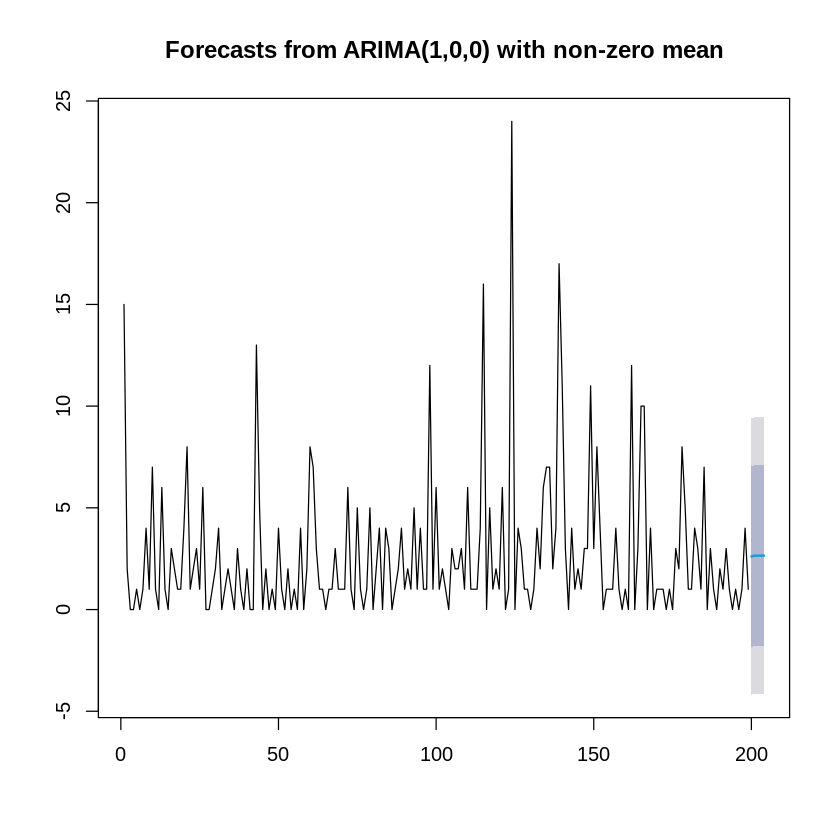

In [23]:
# Hacer una predicción para el equipo específico
forecast_length <- 5  # Número de periodos a predecir
forecast_result <- forecast(models[[as.character(equipment_example)]], h = forecast_length)
print(forecast_result)

# Graficar el resultado de la predicción
plot(forecast_result)

# Evaluar el rendimiento del modelo para un equipo específico
actuals <- df_filtrado %>% filter(Equipment == equipment_example) %>% pull(Days_Between_Failures)
predictions <- fitted(models[[as.character(equipment_example)]])
mse <- mean((actuals - predictions)^2)
print(paste("MSE:", mse))

**ANALISIS DE SUPERVIVENCIA PARA MAQUINARIA DE RUEDO DE MANGA**

In [25]:
# Cargar datos
url <- "https://raw.githubusercontent.com/cesargar1507/DatasetsUB/main/maquina2.csv"
data <- read_csv(url, show_col_types = FALSE)

In [26]:
head(data,5)

Equipment,Operation,WO Type,Model Base,Problem Code,Failure Code,Cause Code,Action Code,Date,downtimeGross,partsCost,repairHours
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<dbl>
100268,BIND LEG,Corrective Maintenance,VF2500,SEWP002,SEWF001,SEWC012,SEWA013,1/17/2024,3.00,12.50,2.00
100268,BIND LEG,Corrective Maintenance,VF2500,SEWP002,SEWF001,SEWC017,SEWA013,10/3/2023,1.25,16.81,1.25
100268,BIND LEG,Calibration,VF2500,SEWP001,SEWF001,SEWC001,SEWA001,7/14/2023,0.08,0.74,0.08
100312,BARTACK,Corrective Maintenance,LT2-B872,SEWP001,SEWF001,SEWC005,SEWA005,3/18/2023,0.25,2.67,0.25
100312,SET ZIPPER,Corrective Maintenance,LT2-B872,SEWP001,SEWF008,SEWC082,SEWA083,3/9/2023,0.33,0.00,0.33


In [27]:
# Filtrar el DataFrame por 'WO Type' igual a 'Corrective Maintenance'
data <- data %>%
  filter(`WO Type` == "Corrective Maintenance")
data <- data%>%
  filter(Operation == "HEM SLEEVE")

In [28]:
# Convertir la columna 'Date' al formato adecuado
data$Date <- as.Date(data$Date, format="%m/%d/%Y")  # Ajusta el formato según tus datos

# Ordenar por equipo y fecha
data <- data %>% arrange(Equipment, Date)

# Calcular el tiempo entre fallas y si la falla ocurrió
data <- data %>%
  group_by(Equipment) %>%
  mutate(Previous_Failure_Date = lag(Date),
         Days_Between_Failures = as.numeric(Date - Previous_Failure_Date),
         Event_Occurred = ifelse(is.na(Previous_Failure_Date), 0, 1)) %>%
  ungroup()

# Eliminar filas con NA en 'Days_Between_Failures'
data <- data %>% filter(!is.na(Days_Between_Failures))

In [29]:
head(data,5)

Equipment,Operation,WO Type,Model Base,Problem Code,Failure Code,Cause Code,Action Code,Date,downtimeGross,partsCost,repairHours,Previous_Failure_Date,Days_Between_Failures,Event_Occurred
<dbl>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<date>,<dbl>,<dbl>,<dbl>,<date>,<dbl>,<dbl>
108454,HEM SLEEVE,Corrective Maintenance,WT562,SEWP002,SEWF008,SEWC001,SEWA001,2023-07-25,1.08,0,1.00,2023-07-21,4,1
108454,HEM SLEEVE,Corrective Maintenance,WT562,SEWP002,SEWF009,SEWC104,SEWA099,2023-07-25,7.58,0,7.50,2023-07-25,0,1
108454,HEM SLEEVE,Corrective Maintenance,WT562,SEWP002,SEWF001,SEWC261,SEWA253,2023-07-26,1.08,0,1.00,2023-07-25,1,1
108454,HEM SLEEVE,Corrective Maintenance,WT562,SEWP002,SEWF009,SEWC001,SEWA001,2023-07-27,6.92,0,6.83,2023-07-26,1,1
108454,HEM SLEEVE,Corrective Maintenance,WT562,SEWP002,SEWF009,SEWC093,SEWA089,2023-07-28,0.75,0,0.75,2023-07-27,1,1


In [30]:
# Convertir las variables categóricas a factores
data$Equipment <- as.factor(data$Equipment)
data$Operation <- as.factor(data$Operation)
data$Model.Base <- as.factor(data$`Model Base`)
data$Problem.Code <- as.factor(data$`Problem Code`)
data$Failure.Code <- as.factor(data$`Failure Code`)
data$Cause.Code <- as.factor(data$`Cause Code`)
data$Action.Code <- as.factor(data$`Action Code`)

In [31]:
cox_model <- coxph(Surv(Days_Between_Failures, Event_Occurred) ~
                  Model.Base + Problem.Code + Failure.Code + Cause.Code +
                   Action.Code + downtimeGross + partsCost +repairHours, data = data)

In [32]:
# Resumen del modelo
summary(cox_model)

Call:
coxph(formula = Surv(Days_Between_Failures, Event_Occurred) ~ 
    Model.Base + Problem.Code + Failure.Code + Cause.Code + Action.Code + 
        downtimeGross + partsCost + repairHours, data = data)

  n= 12813, number of events= 12813 

                          coef  exp(coef)   se(coef)      z Pr(>|z|)    
Model.BaseUS39500   -1.450e+00  2.347e-01  1.004e+00 -1.444 0.148663    
Model.BaseVC1700     9.715e-02  1.102e+00  7.365e-02  1.319 0.187140    
Model.BaseVC2700     2.200e-01  1.246e+00  7.400e-02  2.973 0.002948 ** 
Model.BaseVC2711     2.896e-01  1.336e+00  8.540e-02  3.391 0.000696 ***
Model.BaseVC2713     1.002e-01  1.105e+00  7.557e-02  1.325 0.185089    
Model.BaseVC2785     4.880e-02  1.050e+00  1.542e-01  0.316 0.751698    
Model.BaseWT500     -6.404e-01  5.271e-01  1.409e-01 -4.547 5.45e-06 ***
Model.BaseWT562     -5.794e-01  5.602e-01  1.914e-01 -3.027 0.002471 ** 
Problem.CodeSEWP002  7.697e-02  1.080e+00  2.880e-02  2.673 0.007522 ** 
Problem.CodeSEWP003  9.35

Warning message in .pvalue(fit, data = data, method = method, pval = pval, pval.coord = pval.coord, :
“There are no survival curves to be compared. 
 This is a null model.”


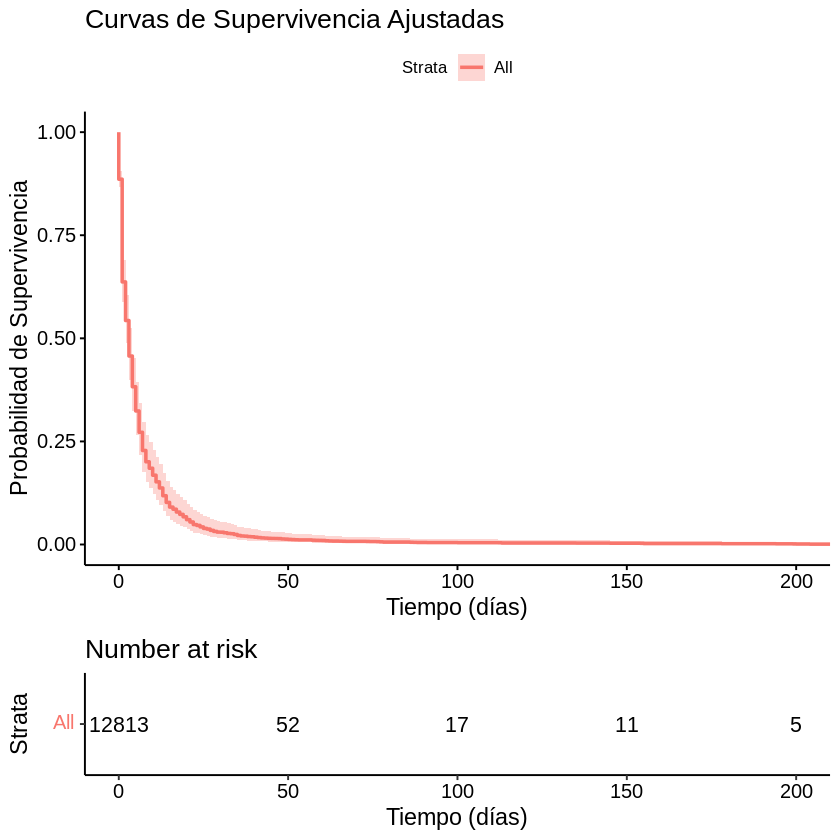

In [42]:
# Curvas de supervivencia ajustadas
fit <- survfit(cox_model)
ggsurvplot(fit, data = data, risk.table = TRUE, pval = TRUE,
           title = "Curvas de Supervivencia Ajustadas",
           xlab = "Tiempo (días)", ylab = "Probabilidad de Supervivencia")
